# Análisis de Componentes Principales (PCA)

Este notebook presenta un ejemplo práctico del **Análisis de Componentes Principales (PCA)**, una técnica de reducción de dimensionalidad ampliamente utilizada para explorar y visualizar relaciones entre variables correlacionadas.

### 📊 Ejemplo práctico

Aplicando los conceptos aprendidos en esta clase y en sesiones anteriores, trabajaremos con un **conjunto de datos de consumo de proteínas** en distintos países europeos.  
Este dataset es multivariante y contiene valores reales que describen el **consumo medio de diferentes tipos de proteínas** por parte de los ciudadanos de **6 países de Europa**.

Cada fila representa un país, mientras que las columnas corresponden a los distintos tipos de proteínas consumidas.  
Las primeras ocho columnas describen los tipos específicos de proteínas, y la última columna contiene el **valor total medio** del consumo de proteínas por país.

🔗 **Ejemplo original:**  
[Adaptado de Tutorial de análisis de componentes principales en R](https://www.datacamp.com/es/tutorial/pca-analysis-r)

🔗 **Repositorio del material de clase:**  
[github.com/JeroHoyos/clase-pca](https://github.com/JeroHoyos/clase-pca)

👨‍💻 **Autor:** Jerónimo Hoyos Botero  
🏫 **Semillero de Redes Neuronales — Universidad Nacional de Colombia**




## Preparación del entorno

Descarga de librerías y configuración para realizar este ejemplo práctico

In [ ]:
pip install -r requirements.txt

In [ ]:
# 1) Librerías esenciales y configuraciones

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estilo gráfico
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style='whitegrid', font_scale=1.1)


## Carga de los datos

Veamos que existen en estos datos

In [ ]:
# 2) Cargar los datos

# Cargar de los datos desde el archivo 'protein.jpg'
path = 'protein.csv'
df = pd.read_csv(path)

# Verificar si se cargó correctamente
if df is None:
    print(f"Error: No se pudo cargar los datos en la ruta: {path}")
    print("Asegúrese de que el archivo existe y la ruta es correcta.")
else:
    print("Datos cargados exitosamente!")

print('Datos cargados. Dimensiones:', df.shape)
# Mostrar las primeras filas
df.head()

Datos cargados exitosamente!
Datos cargados. Dimensiones: (6, 12)


,index,Country,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereals,Starchy_Foods,Pulses_nuts_oilseeds,Fruits_Vegetables,Total
0,1,Albania,10,1,1,9,0,42,1,6,2,72
1,2,Austria,9,14,4,20,2,28,4,1,4,86
2,3,Belgium,14,9,4,18,5,27,6,2,4,89
3,4,Bulgaria,8,6,2,8,1,57,1,4,4,91
4,5,Czechoslovakia,10,11,3,13,2,34,5,1,4,83



## Exploración rápida de los datos

A continuación revisamos la estructura, tipos y valores faltantes del dataset. Esto ayuda a decidir pasos de preprocesamiento.

In [19]:
# 3) Exploración básica

print('Columnas:', df.columns.tolist())
print('\nResumen de tipos:')
print(df.dtypes)
print('\nValores faltantes por columna:')
print(df.isna().sum())

# Estadísticas descriptivas
df.describe().T


Columnas: ['index', 'Country', 'Red_Meat', 'White_Meat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starchy_Foods', 'Pulses_nuts_oilseeds', 'Fruits_Vegetables', 'Total']

Resumen de tipos:
index                    int64
Country                 object
Red_Meat                 int64
White_Meat               int64
Eggs                     int64
Milk                     int64
Fish                     int64
Cereals                  int64
Starchy_Foods            int64
Pulses_nuts_oilseeds     int64
Fruits_Vegetables        int64
Total                    int64
dtype: object

Valores faltantes por columna:
index                   0
Country                 0
Red_Meat                0
White_Meat              0
Eggs                    0
Milk                    0
Fish                    0
Cereals                 0
Starchy_Foods           0
Pulses_nuts_oilseeds    0
Fruits_Vegetables       0
Total                   0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
index,6.0,3.500000,1.870829,1.0,2.25,3.5,4.75,6.0
Red_Meat,6.0,10.333333,2.065591,8.0,9.25,10.0,10.75,14.0
White_Meat,6.0,8.666667,4.589844,1.0,6.75,10.0,11.00,14.0
Eggs,6.0,3.000000,1.264911,1.0,2.25,3.5,4.00,4.0
Milk,6.0,15.500000,6.655825,8.0,10.00,15.5,19.50,25.0
Fish,6.0,3.333333,3.669696,0.0,1.25,2.0,4.25,10.0
Cereals,6.0,35.000000,12.774976,22.0,27.25,31.0,40.00,57.0
Starchy_Foods,6.0,3.666667,2.160247,1.0,1.75,4.5,5.00,6.0
Pulses_nuts_oilseeds,6.0,2.500000,2.073644,1.0,1.00,1.5,3.50,6.0
Fruits_Vegetables,6.0,3.333333,1.032796,2.0,2.50,4.0,4.00,4.0


Podemos visualizar que estos países eran soberanos en Europa durante el período de entreguerras. pero por ejemplo Checoslovaquia ya no existe (1 de enero de 1993)

Por lo tanto, podemos concluir que son unos datos ciertamente viejos

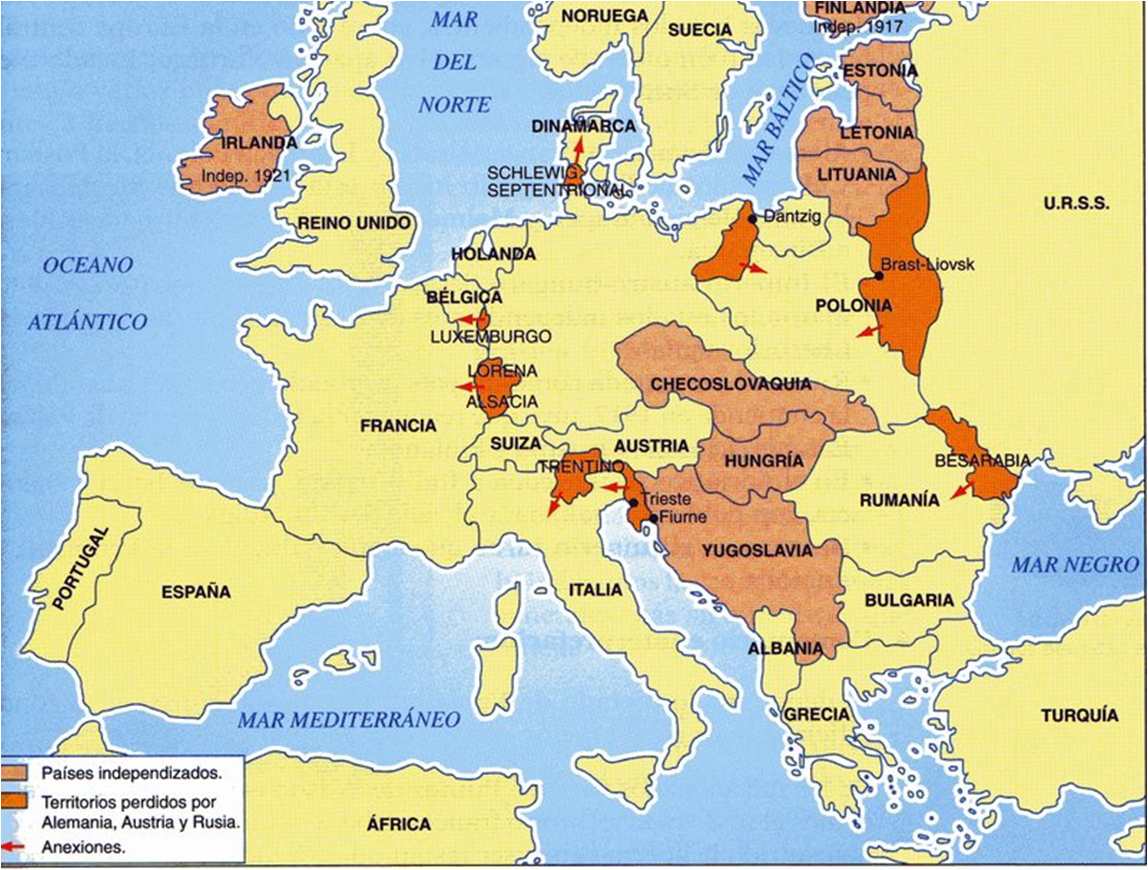

Mapa de cómo eran los países en esa época

## Selección de variables para el PCA

El PCA se aplica a variables numéricas. Aquí detectamos automáticamente las columnas numéricas y permitimos al usuario elegir otras si lo desea.

In [20]:
# 4) Selección automática de variables para el PCA

# Tomaremos los datos de los alimentos
X = df.iloc[:, 2:11]

print('Usando para PCA (features):', X.columns)
X.shape
X.head()

Usando para PCA (features): Index(['Red_Meat', 'White_Meat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starchy_Foods', 'Pulses_nuts_oilseeds', 'Fruits_Vegetables'],
      dtype='object')


,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereals,Starchy_Foods,Pulses_nuts_oilseeds,Fruits_Vegetables
0,10,1,1,9,0,42,1,6,2
1,9,14,4,20,2,28,4,1,4
2,14,9,4,18,5,27,6,2,4
3,8,6,2,8,1,57,1,4,4
4,10,11,3,13,2,34,5,1,4


## Preprocesamiento

- Estandarización: media 0 y varianza 1, esencial antes de PCA.


In [ ]:
# 5) Estandarización de los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

standardized_df = pd.DataFrame(X_scaled, columns=X.columns)
standardized_df.head()

,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereals,Starchy_Foods,Pulses_nuts_oilseeds,Fruits_Vegetables
0,-0.176777,-1.829782,-1.732051,-1.069799,-0.995037,0.600245,-1.352247,1.848947,-1.414214
1,-0.707107,1.272892,0.866025,0.740630,-0.398015,-0.600245,0.169031,-0.792406,0.707107
2,1.944544,0.079556,0.866025,0.411461,0.497519,-0.685994,1.183216,-0.264135,0.707107
3,-1.237437,-0.636446,-0.866025,-1.234383,-0.696526,1.886484,-1.352247,0.792406,0.707107
4,-0.176777,0.556890,0.000000,-0.411461,-0.398015,-0.085749,0.676123,-0.792406,0.707107


## Cálculo de la Matriz de Covarianza

Calculamos la matriz de covarianza para analizar la linealidad de los datos


In [35]:
# 6) Matriz de Covarianza

corr_matrix = standardized_df.corr()
corr_matrix

,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereals,Starchy_Foods,Pulses_nuts_oilseeds,Fruits_Vegetables
Red_Meat,1.000000,0.077350,0.459279,0.436420,0.510108,-0.621498,0.702197,-0.233465,-0.062500
White_Meat,0.077350,1.000000,0.895665,0.726697,0.447259,-0.631021,0.732882,-0.966620,0.450035
Eggs,0.459279,0.895665,1.000000,0.878962,0.689382,-0.792118,0.878310,-0.914991,0.306186
Milk,0.436420,0.726697,0.878962,1.000000,0.851592,-0.900880,0.751136,-0.760770,-0.174568
Fish,0.510108,0.447259,0.689382,0.851592,1.000000,-0.699655,0.647539,-0.578214,-0.351799
Cereals,-0.621498,-0.631021,-0.792118,-0.900880,-0.699655,1.000000,-0.847915,0.702132,0.181902
Starchy_Foods,0.702197,0.732882,0.878310,0.751136,0.647539,-0.847915,1.000000,-0.848293,0.239046
Pulses_nuts_oilseeds,-0.233465,-0.966620,-0.914991,-0.760770,-0.578214,0.702132,-0.848293,1.000000,-0.373544
Fruits_Vegetables,-0.062500,0.450035,0.306186,-0.174568,-0.351799,0.181902,0.239046,-0.373544,1.000000


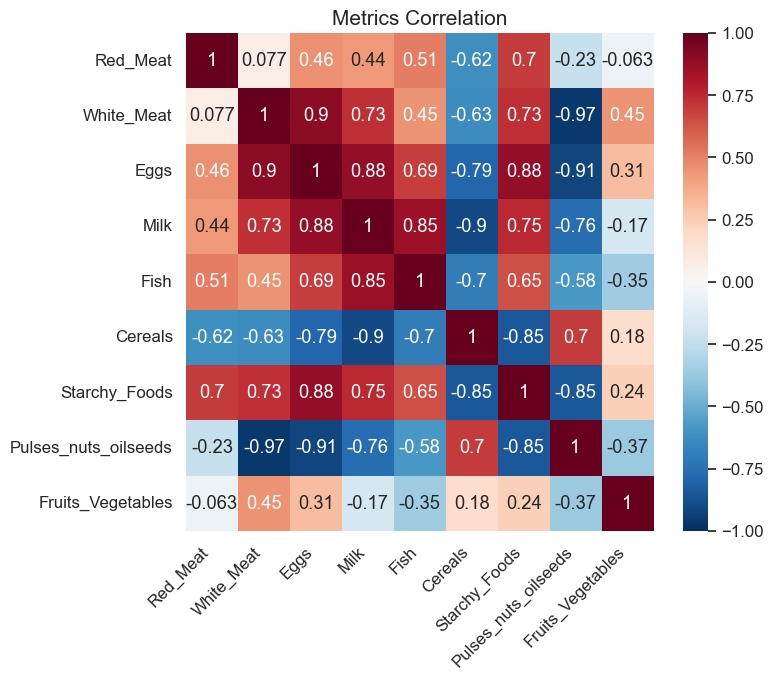

In [23]:
# Visualización más expresiva

plt.figure(figsize=(8, 7))

sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)

plt.title("Metrics Correlation", fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Recordemos:
- Cuanto mayor sea el valor, más positivamente correlacionadas están las dos variables.
- Cuanto más se acerque el valor a -1, más negativamente correlacionadas estarán.

## Cálculo del PCA

Calculamos todas las componentes y extraemos autovalores, varianza explicada, y loadings (cargas de las variables).


In [ ]:
# 7) Cálculo del PCA 

pca = PCA()
pca.fit(corr_matrix)

summary = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Varianza explicada": np.round(pca.explained_variance_ratio_, 4),
    "Varianza acumulada": np.round(np.cumsum(pca.explained_variance_ratio_),4)
})

print(summary)

  Componente  Varianza explicada  Varianza acumulada
0        PC1              0.8777              0.8777
1        PC2              0.0971              0.9748
2        PC3              0.0232              0.9980
3        PC4              0.0017              0.9996
4        PC5              0.0004              1.0000
5        PC6              0.0000              1.0000
6        PC7              0.0000              1.0000
7        PC8              0.0000              1.0000
8        PC9              0.0000              1.0000


- PC1: explica casi el 87,8 % de la varianza total. 
- PC2: El segundo explica el 9,7 % de la varianza total. 

La proporción acumulada de PC1 y PC2 explica casi el 97 % de la varianza total. Esto significa que los dos primeros componentes principales pueden representar con precisión los datos. 

## Scree plot
Muestra la varianza explicada por cada componente (criterio de la rodilla/elbow).

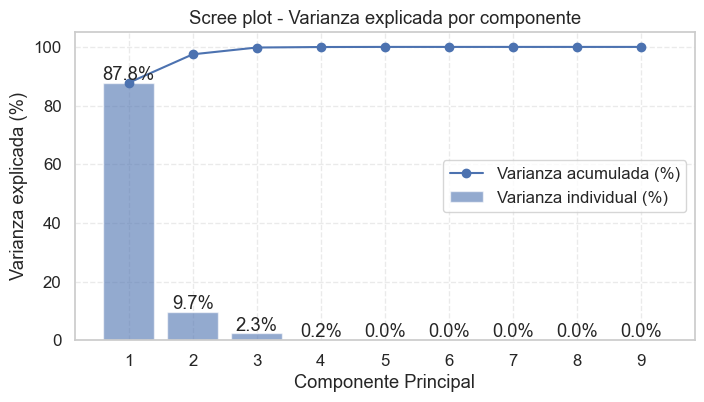

In [ ]:
# 8) Scree plot

explained_var = pca.explained_variance_ratio_ * 100
plt.figure(figsize=(8,4))
n_comp = len(pca.explained_variance_ratio_)

plt.plot(range(1, n_comp+1), np.cumsum(pca.explained_variance_ratio_)*100, marker='o', label='Varianza acumulada (%)')

plt.bar(range(1, n_comp+1), pca.explained_variance_ratio_*100, alpha=0.6, label='Varianza individual (%)')

plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada (%)')

plt.title('Scree plot - Varianza explicada por componente')
plt.xticks(range(1, n_comp+1))
plt.legend()

plt.grid(True, linestyle='--', alpha=0.4)
for i, v in enumerate(explained_var):
    plt.text(i + 1, v + 1, f"{v:.1f}%", ha='center')

plt.show()


## Loadings (cargas) y Cos²

- **Loadings:** correlaciones entre variables originales y componentes (se presentan como matriz).  
- **Cos²:** calidad de representación de cada variable en el plano formado por las dos primeras componentes.

In [ ]:
# 9) Loadings y Cos2

components = pca.components_

loadings = pd.DataFrame(components.T, index=X.columns, columns=[f'PC{i+1}' for i in range(components.shape[0])])

loadings.head()

# Cos2 en el plano PC1-PC2
sq_loadings = loadings**2
cos2_pc12 = (sq_loadings['PC1'] + sq_loadings['PC2']) / sq_loadings.sum(axis=1)
cos2_df = pd.DataFrame({'cos2_PC12': cos2_pc12}).sort_values('cos2_PC12', ascending=False)
cos2_df.head(10)


,cos2_PC12
Fruits_Vegetables,0.454999
White_Meat,0.263240
Fish,0.220740
Pulses_nuts_oilseeds,0.219106
Cereals,0.185783
Milk,0.175273
Eggs,0.173141
Red_Meat,0.162354
Starchy_Foods,0.145365


## Biplot de variables
Se grafica la proyección de las variables sobre PC1 y PC2 (dirección y longitud de flechas).


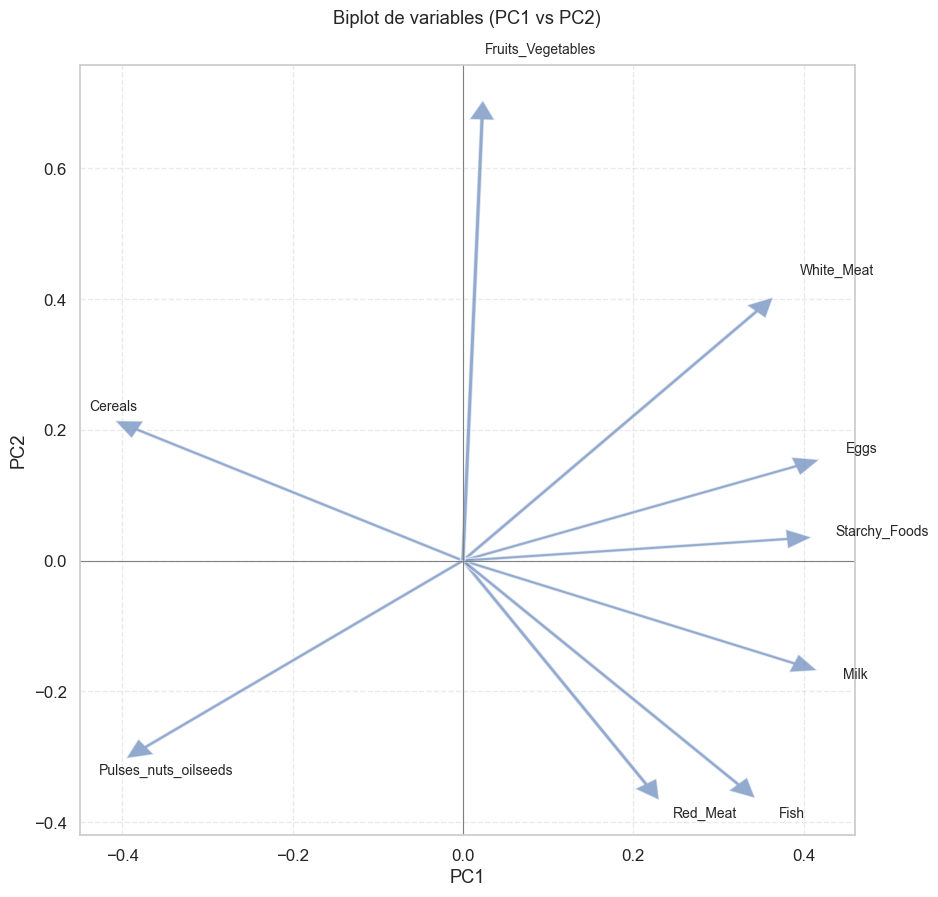

In [69]:
# 10) Biplot de variables (solo PC1 y PC2)

pc1 = loadings['PC1']
pc2 = loadings['PC2']

plt.figure(figsize=(10,10))
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, pc1[var], pc2[var], head_width=0.03, head_length=0.03,width=0.005, alpha=0.6)
    plt.text(pc1[var]*1.15, pc2[var]*1.15, var, fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot de variables (PC1 vs PC2)',pad=30)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


## Gráfico de Cos²
Muestra qué variables están mejor representadas por PC1 y PC2.


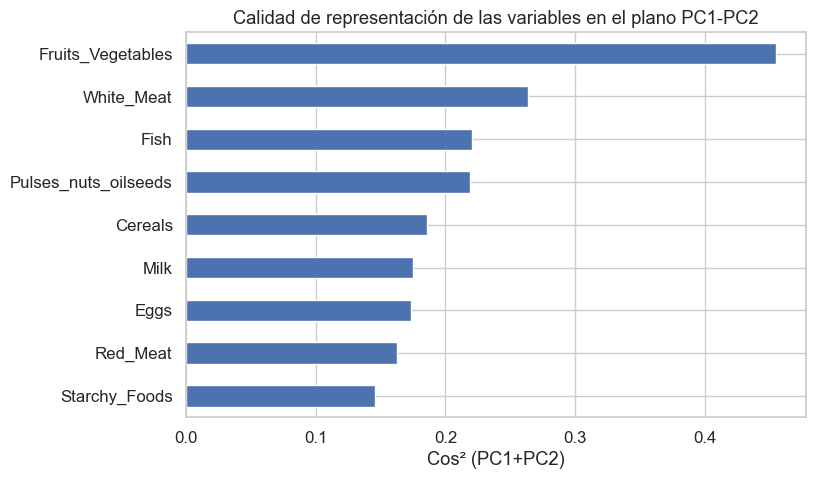

In [ ]:
# 11) Cos2 bar plot

cos2_df_sorted = cos2_df.sort_values('cos2_PC12', ascending=True)
plt.figure(figsize=(8,5))
cos2_df_sorted['cos2_PC12'].plot(kind='barh')
plt.xlabel('Cos² (PC1+PC2)')
plt.title('Calidad de representación de las variables en el plano PC1-PC2')
plt.show()

## Ejercicio propuesto: Análisis del Dataset de Cáncer de Mama

Realizar un análisis al dataset [*Breast Cancer Dataset*](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) aplicando los conocimientos adquiridos en el semillero, incluyendo los vistos en esta clase.  

El objetivo es explorar, procesar y modelar los datos de manera autónoma, aplicando técnicas de análisis estadístico, reducción de dimensionalidad y aprendizaje automático.  

También se puede tomar como referencia el paper [*Breast Cancer Prediction using Principal Component Analysis with Logistic Regression*](https://ijaem.net/issue_dcp/Breast%20Cancer%20Prediction%20using%20Principal%20Component%20Analysis%20with%20Logistic%20Regression.pdf), donde se analiza el mismo dataset, para comparar resultados y proponer posibles mejoras.
